In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
#X表示我們只取幾個特徵空間中的幾個維度
X, Y = iris.data[:,2:4], iris.target

In [4]:
#原始數據跟DBSCAN預測
def plot_actual_prediction_iris(X, Y, Y_preds):
  with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))
        #設置 numRows＝1，numCols＝2，將圖表繪製成1x2的圖片區域
        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="o")
        plt.scatter(X[Y==1,0],X[Y==1,1], c = 'yellow', marker="o")
        plt.scatter(X[Y==2,0],X[Y==2,1], c = 'green', marker="o")
        plt.xlabel(iris.feature_names[2])
        plt.ylabel(iris.feature_names[3])
        plt.title("Original Data")
        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="o")
        plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'yellow', marker="o")
        plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'green', marker="o")
        plt.xlabel(iris.feature_names[2])
        plt.ylabel(iris.feature_names[3])
        plt.title("DBSCAN");

In [5]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.7, min_samples = 3)
Y_preds = db.fit_predict(X)
Y_true = iris.target

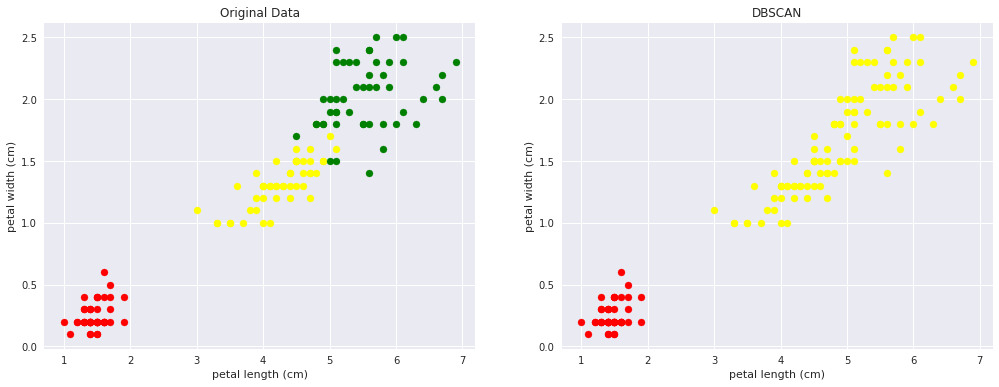

In [6]:
plot_actual_prediction_iris(X, Y, Y_preds)

In [7]:
import numpy as np
from sklearn import metrics
def purity_score(Y_true, Y_preds):
    contingency_matrix = metrics.cluster.contingency_matrix(Y_true, Y_preds)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
purity_score(Y_true, Y_preds)

0.6666666666666666